**4. Regression Notebook**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate N data points
N = 20

# random data on the x-axis in (-5,5)
X = np.random.random(N)*10 - 5

# A line plus some noise
Y = 0.5*X - 1 + np.random.randn(N)

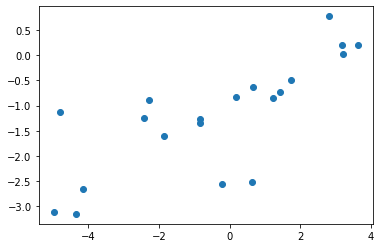

In [3]:
plt.scatter(X, Y)

In [4]:
# Create linear regression model
model = nn.Linear(1,1)

In [5]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [6]:
# In ML we want the data to be in shape:
# (num_samples x num_dimensions)
X = X.reshape(N,1)
Y = Y.reshape(N,1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [ ]:
type(inputs)

torch.Tensor

In [7]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradient
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs,targets)

  # Keep the loss so we can plot later
  losses.append(loss.item()) # .item() returens the number from a single tensor

  # Backward and Optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 1.6735
Epoch 2/30, Loss: 1.0949
Epoch 3/30, Loss: 0.8441
Epoch 4/30, Loss: 0.7121
Epoch 5/30, Loss: 0.6342
Epoch 6/30, Loss: 0.5855
Epoch 7/30, Loss: 0.5544
Epoch 8/30, Loss: 0.5344
Epoch 9/30, Loss: 0.5215
Epoch 10/30, Loss: 0.5131
Epoch 11/30, Loss: 0.5077
Epoch 12/30, Loss: 0.5041
Epoch 13/30, Loss: 0.5019
Epoch 14/30, Loss: 0.5004
Epoch 15/30, Loss: 0.4994
Epoch 16/30, Loss: 0.4988
Epoch 17/30, Loss: 0.4984
Epoch 18/30, Loss: 0.4981
Epoch 19/30, Loss: 0.4980
Epoch 20/30, Loss: 0.4979
Epoch 21/30, Loss: 0.4978
Epoch 22/30, Loss: 0.4977
Epoch 23/30, Loss: 0.4977
Epoch 24/30, Loss: 0.4977
Epoch 25/30, Loss: 0.4977
Epoch 26/30, Loss: 0.4977
Epoch 27/30, Loss: 0.4977
Epoch 28/30, Loss: 0.4977
Epoch 29/30, Loss: 0.4977
Epoch 30/30, Loss: 0.4977


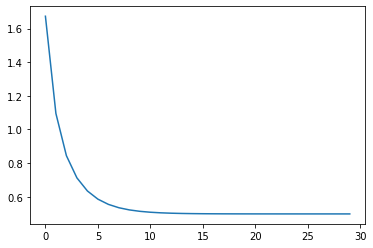

In [8]:
# Plot the loss per iteration
plt.plot(losses);

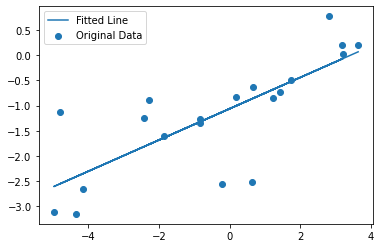

In [9]:
# Plot the graph
predicted = model(inputs).detach().numpy() #.detach is required when we apply .numpy on a tensor with gradients
plt.scatter(X, Y, label="Original Data")
plt.plot(X, predicted, label="Fitted Line")
plt.legend()
plt.show()

In [10]:
# Another way (instead of .detach())
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[ 0.06445706],
       [-0.86393845],
       [-1.8187735 ],
       [-2.3545249 ],
       [-2.5558748 ],
       [-1.3231926 ],
       [-1.7716384 ],
       [-1.6417727 ],
       [-0.8621414 ],
       [-1.1305125 ],
       [-0.06678593],
       [-1.3225089 ],
       [-0.19351226],
       [-0.07935172],
       [-1.0077126 ],
       [-2.6065025 ],
       [-0.61729115],
       [-0.5225232 ],
       [-0.6869817 ],
       [-2.4073882 ]], dtype=float32)

In [13]:
# Important
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True Values of (w, b) are (-0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.31000206]] [-1.0638136]
tensor([[0.3100]])
